In [ ]:
import pandas as pd

pd.__version__

'1.1.5'

In [ ]:
col_names = ['seqid','source','type','start','end','score','strand','phase','attributes']


df = pd.read_csv('drive/MyDrive/Homo_sapiens.GRCh38.104.gff3.gz', compression='gzip',
                         sep='\t', comment='#', low_memory=False,
                         header=None, names=col_names)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

a = df.end
b = df.seqid

a, b = np.meshgrid(a, b)

# surface plot for a + b
fig = plt.figure()
axes = fig.gca(projection ='3d')
axes.plot_surface(a, b, a + b)

plt.show()


ValueError: ignored

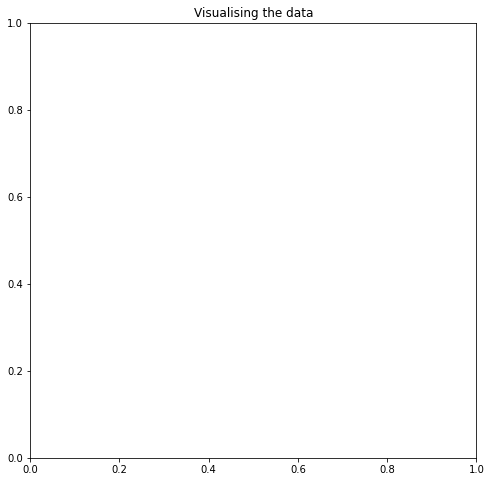

In [ ]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

In [ ]:

df = df.rename(columns={"index":"Sr N"})
df['Sr N'] = df.index +1

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='start', y='end', z='Sr N',
              color='seqid')



fig.show()

In [ ]:
df.type.unique()

array(['chromosome', 'biological_region', 'pseudogene', 'lnc_RNA', 'exon',
       'pseudogenic_transcript', 'ncRNA_gene', 'miRNA', 'gene', 'mRNA',
       'five_prime_UTR', 'CDS', 'three_prime_UTR', 'snRNA', 'ncRNA',
       'unconfirmed_transcript', 'snoRNA', 'scRNA', 'rRNA',
       'V_gene_segment', 'D_gene_segment', 'J_gene_segment',
       'C_gene_segment', 'scaffold', 'tRNA'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150455 entries, 0 to 3150454
Data columns (total 9 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   seqid       object
 1   source      object
 2   type        object
 3   start       int64 
 4   end         int64 
 5   score       object
 6   strand      object
 7   phase       object
 8   attributes  object
dtypes: int64(2), object(7)
memory usage: 216.3+ MB


In [ ]:
df.type.unique()

array(['chromosome', 'biological_region', 'pseudogene', 'lnc_RNA', 'exon',
       'pseudogenic_transcript', 'ncRNA_gene', 'miRNA', 'gene', 'mRNA',
       'five_prime_UTR', 'CDS', 'three_prime_UTR', 'snRNA', 'ncRNA',
       'unconfirmed_transcript', 'snoRNA', 'scRNA', 'rRNA',
       'V_gene_segment', 'D_gene_segment', 'J_gene_segment',
       'C_gene_segment', 'scaffold', 'tRNA'], dtype=object)

In [ ]:
df.seqid.unique().shape

(194,)

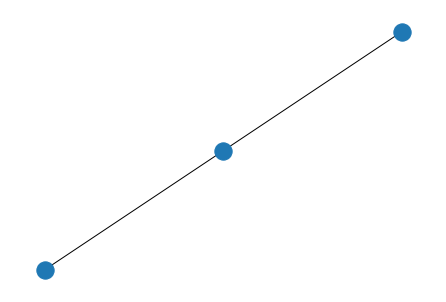

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_nodes_from([1,2, 3])
G.add_edges_from([(1, 2), (1, 3)])
nx.draw(G)
#plt.subplot(122)
#plt.show()

In [ ]:
df.source.value_counts()

havana                   2001886
ensembl_havana            656222
.                         182510
ensembl                   174909
havana_tagene             128831
mirbase                     5631
GRCh38                       194
ensembl_havana_tagene        148
insdc                        124
Name: source, dtype: int64

In [ ]:
#how much of genome is incomplete
gdf = df[df.source=='GRCh38']

In [ ]:
gdf.shape

(194, 9)

In [ ]:
gdf.type.unique()

array(['chromosome', 'scaffold'], dtype=object)

In [ ]:
gdf.sample(10)


seqid  ...                                         attributes
3037758  GL000225.1  ...  ID=scaffold:GL000225.1;Alias=chr14_GL000225v1_...
3040113  KI270747.1  ...  ID=scaffold:KI270747.1;Alias=chrUn_KI270747v1,...
3037204  GL000213.1  ...  ID=scaffold:GL000213.1;Alias=chrUn_GL000213v1,...
3038561  KI270716.1  ...  ID=scaffold:KI270716.1;Alias=chr2_KI270716v1_r...
3038146  KI270712.1  ...  ID=scaffold:KI270712.1;Alias=chr1_KI270712v1_r...
3037837  KI270340.1  ...  ID=scaffold:KI270340.1;Alias=chrUn_KI270340v1,...
3037821  KI270310.1  ...  ID=scaffold:KI270310.1;Alias=chrUn_KI270310v1,...
3038662  KI270720.1  ...  ID=scaffold:KI270720.1;Alias=chr9_KI270720v1_r...
3037876  KI270425.1  ...  ID=scaffold:KI270425.1;Alias=chrUn_KI270425v1,...
3037859  KI270390.1  ...  ID=scaffold:KI270390.1;Alias=chrUn_KI270390v1,...

[10 rows x 9 columns]

In [ ]:
gdf = gdf.copy()
gdf['length'] = gdf.end - gdf.start+1
gdf.head()

NameError: ignored

In [ ]:
gdf.length.sum()

3096629726

In [ ]:
chrs = [str (_) for _ in range(1,23)] + ['X' , 'Y' , 'MT']
gdf[-gdf.seqid.isin(chrs)].length.sum()/gdf.length.sum()

0.0037021917421198327

In [ ]:
gdf[(gdf['type'] == 'chromosome')].length.sum() / gdf.length.sum()

0.9962978082578802

In [ ]:
#how many genes are there
edf = df[df.source.isin(['ensembl', 'havana', 'ensembl_havana'])]

In [ ]:
edf.sample(10)


seqid  ...                                         attributes
2288300     4  ...  Parent=transcript:ENST00000311785;Name=ENSE000...
1426181    18  ...  ID=CDS:ENSP00000467072;Parent=transcript:ENST0...
547850     11  ...  ID=CDS:ENSP00000500834;Parent=transcript:ENST0...
1018152    15  ...  Parent=transcript:ENST00000570276;Name=ENSE000...
786210     13  ...  Parent=transcript:ENST00000443765;Name=ENSE000...
312866     10  ...                  Parent=transcript:ENST00000442986
1242989    17  ...  ID=transcript:ENST00000575595;Parent=gene:ENSG...
1375951    17  ...  ID=CDS:ENSP00000461980;Parent=transcript:ENST0...
3076477     X  ...  ID=CDS:ENSP00000365427;Parent=transcript:ENST0...
1965507    21  ...                  Parent=transcript:ENST00000339195

[10 rows x 9 columns]

In [ ]:
#extract parent
import re


parents = re.compile(r'Parent=(?P<Parent>.+?);')

print(parents)
def extract_gene_name(attributes_str):
    res = parents.search(attributes_str)
    #print(res)

    if(res):
        return res.group('Parent')


edf['Parent'] = edf.attributes.apply(extract_gene_name)

edf.head(10)

re.compile('Parent=(?P<Parent>.+?);')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


seqid  ...                      Parent
16     1  ...                        None
17     1  ...        gene:ENSG00000223972
18     1  ...  transcript:ENST00000456328
19     1  ...  transcript:ENST00000456328
20     1  ...  transcript:ENST00000456328
21     1  ...        gene:ENSG00000223972
22     1  ...  transcript:ENST00000450305
23     1  ...  transcript:ENST00000450305
24     1  ...  transcript:ENST00000450305
25     1  ...  transcript:ENST00000450305

[10 rows x 10 columns]

In [ ]:
import re


names = re.compile(r'Name=(?P<Name>.+?);')

print(names)
def extract_gene_name(attributes_str):
    res = names.search(attributes_str)
    #print(res)

    if(res):
        return res.group('Name')


edf['Name'] = edf.attributes.apply(extract_gene_name)

edf.head(10)

re.compile('Name=(?P<Name>.+?);')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


seqid  source  ...                      Parent             Name
16     1  havana  ...                        None          DDX11L1
17     1  havana  ...        gene:ENSG00000223972      DDX11L1-202
18     1  havana  ...  transcript:ENST00000456328  ENSE00002234944
19     1  havana  ...  transcript:ENST00000456328  ENSE00003582793
20     1  havana  ...  transcript:ENST00000456328  ENSE00002312635
21     1  havana  ...        gene:ENSG00000223972      DDX11L1-201
22     1  havana  ...  transcript:ENST00000450305  ENSE00001948541
23     1  havana  ...  transcript:ENST00000450305  ENSE00001671638
24     1  havana  ...  transcript:ENST00000450305  ENSE00001758273
25     1  havana  ...  transcript:ENST00000450305  ENSE00001799933

[10 rows x 11 columns]

In [ ]:
import re


ids = re.compile(r'ID=(?P<ID>.+?);')

print(ids)
def extract_gene_name(attributes_str):
    res = ids.search(attributes_str)
    #print(res)

    if(res):
        return res.group('ID')


edf['ID'] = edf.attributes.apply(extract_gene_name)

edf.head(10)

re.compile('ID=(?P<ID>.+?);')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


seqid  source  ...             Name                          ID
16     1  havana  ...          DDX11L1        gene:ENSG00000223972
17     1  havana  ...      DDX11L1-202  transcript:ENST00000456328
18     1  havana  ...  ENSE00002234944                        None
19     1  havana  ...  ENSE00003582793                        None
20     1  havana  ...  ENSE00002312635                        None
21     1  havana  ...      DDX11L1-201  transcript:ENST00000450305
22     1  havana  ...  ENSE00001948541                        None
23     1  havana  ...  ENSE00001671638                        None
24     1  havana  ...  ENSE00001758273                        None
25     1  havana  ...  ENSE00001799933                        None

[10 rows x 12 columns]

In [ ]:
pd.options.display.max_colwidth = 500
edf.head(100)

seqid  source  ...             Name                          ID
16      1  havana  ...          DDX11L1        gene:ENSG00000223972
17      1  havana  ...      DDX11L1-202  transcript:ENST00000456328
18      1  havana  ...  ENSE00002234944                        None
19      1  havana  ...  ENSE00003582793                        None
20      1  havana  ...  ENSE00002312635                        None
..    ...     ...  ...              ...                         ...
130     1  havana  ...             None  transcript:ENST00000595919
131     1  havana  ...  ENSE00001936432                        None
132     1  havana  ...             None        gene:ENSG00000239906
133     1  havana  ...             None  transcript:ENST00000493797
134     1  havana  ...  ENSE00001922992                        None

[100 rows x 13 columns]

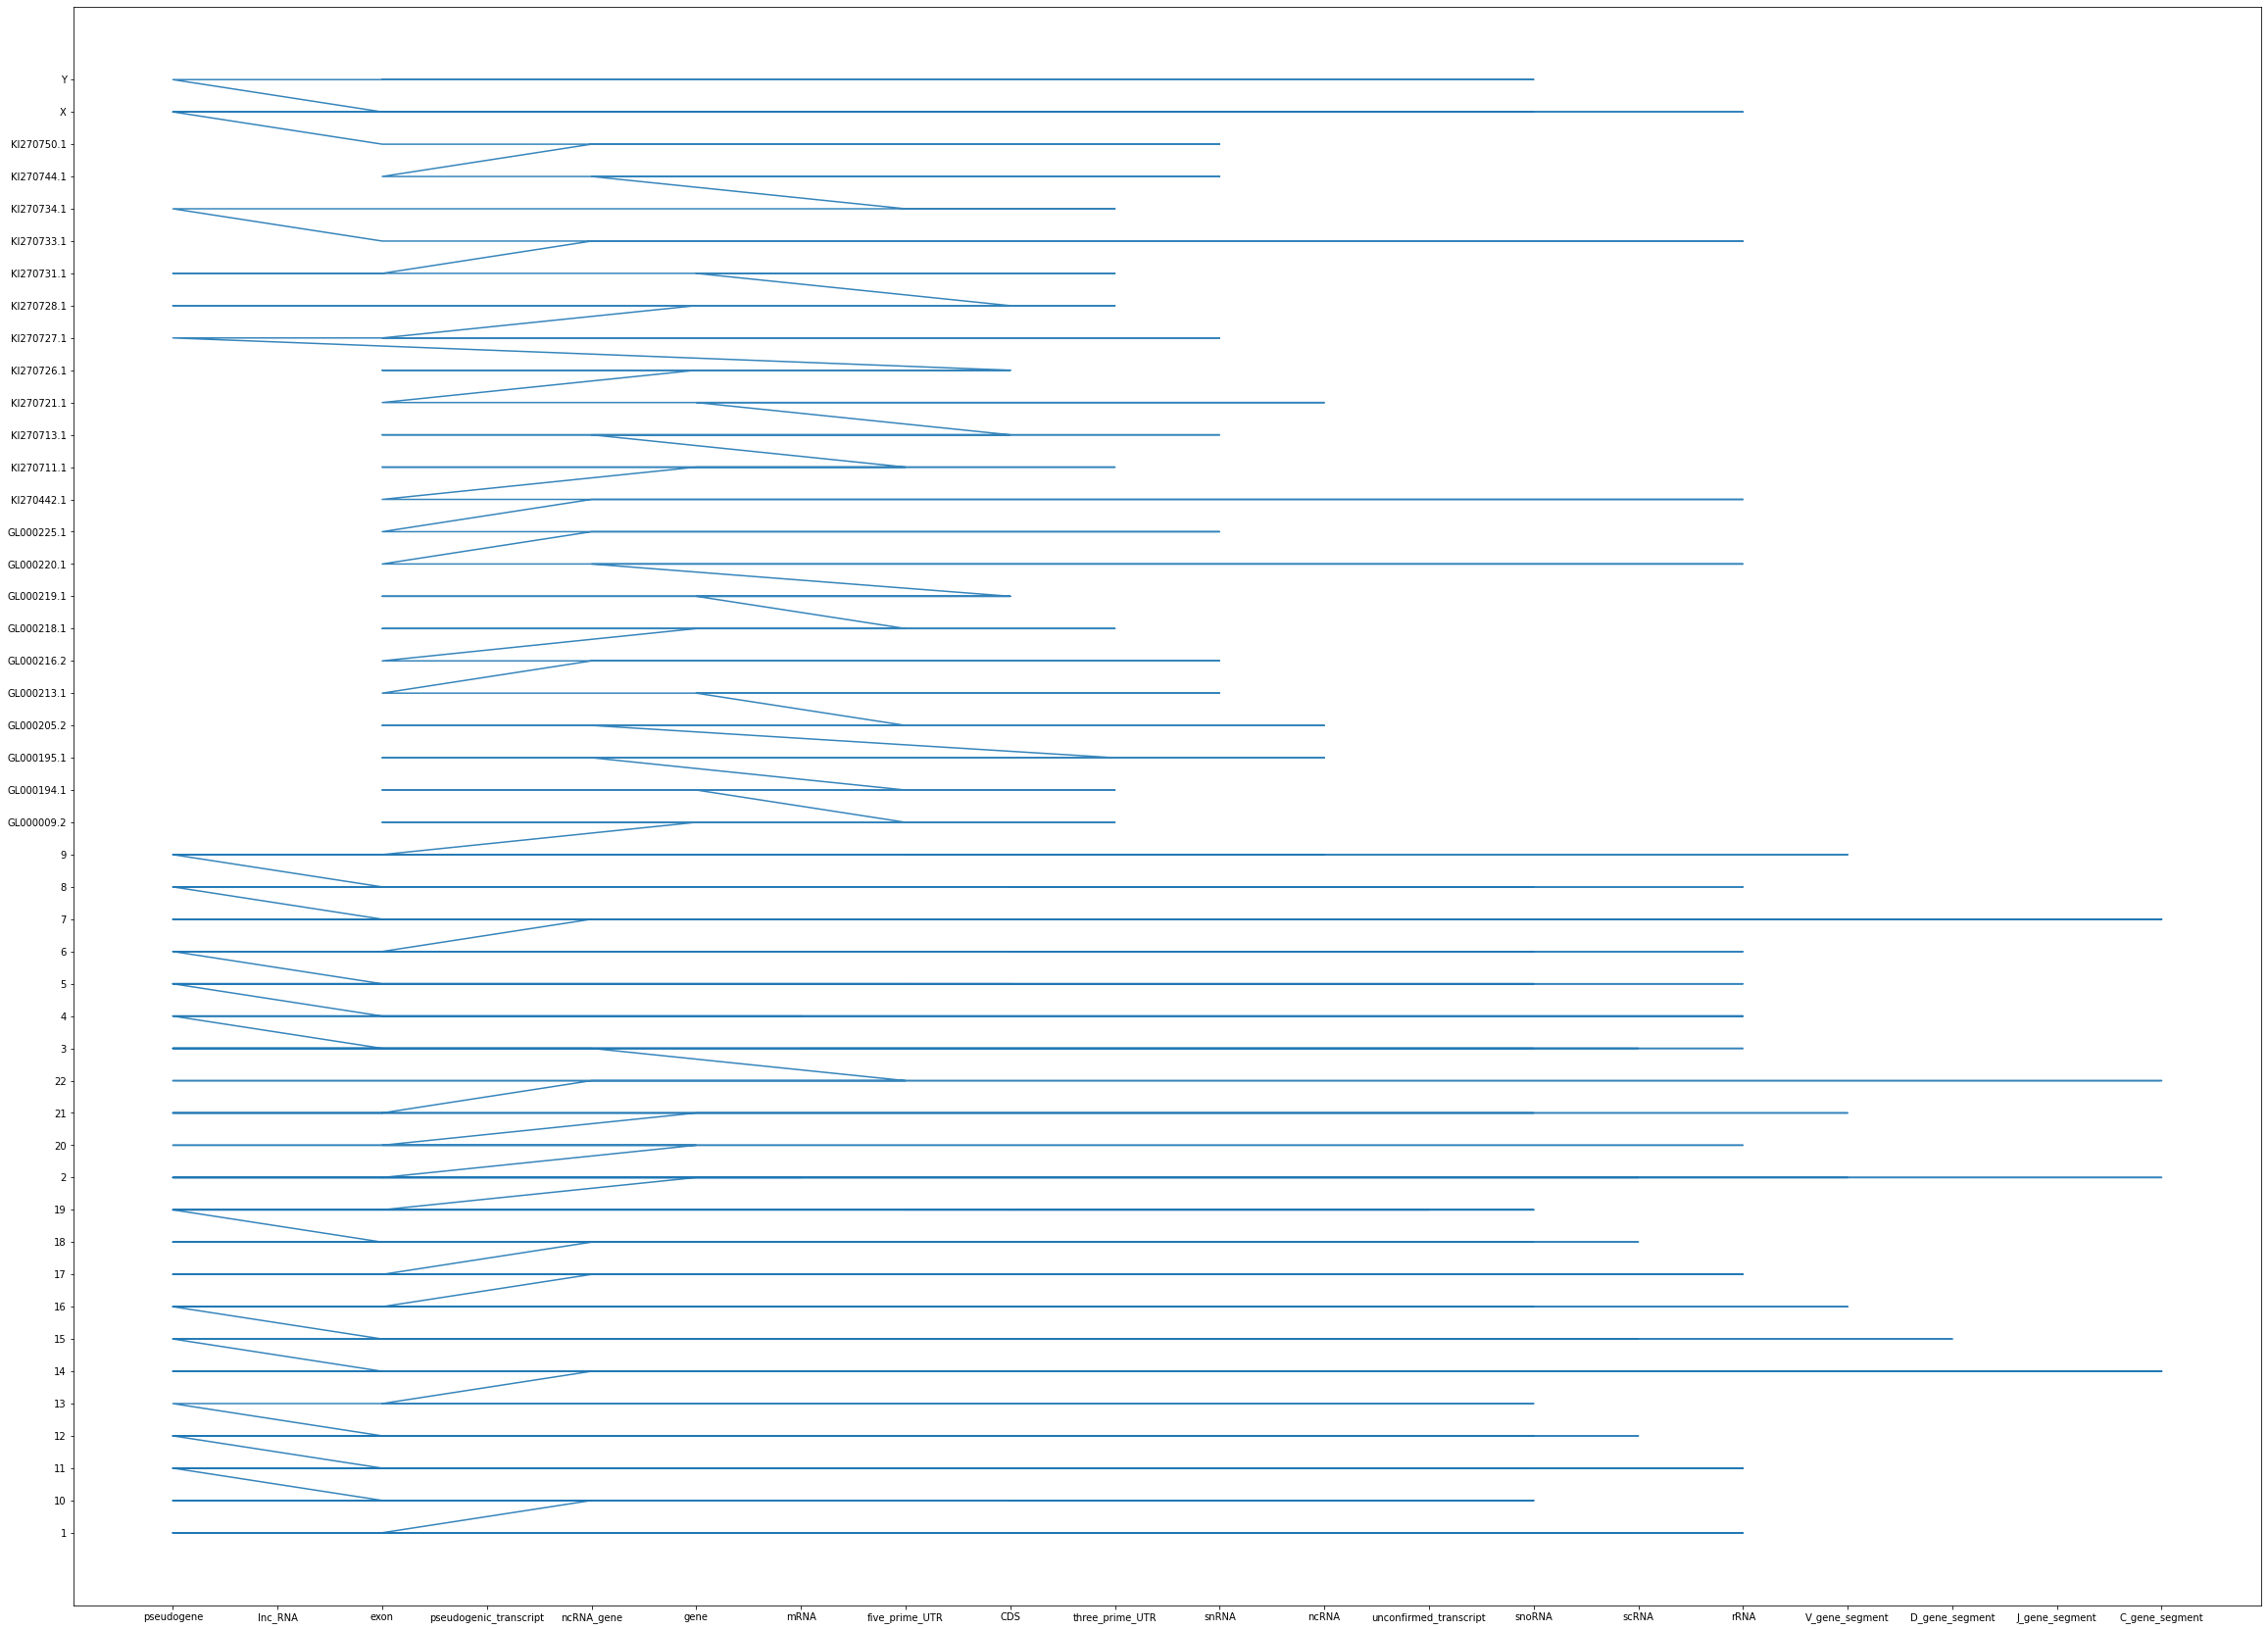

In [ ]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 100000

f = plt.figure()
f.set_figwidth(40)
f.set_figheight(30)

plt.plot(edf.type, edf.seqid, alpha = 0.9)
#plt.show()

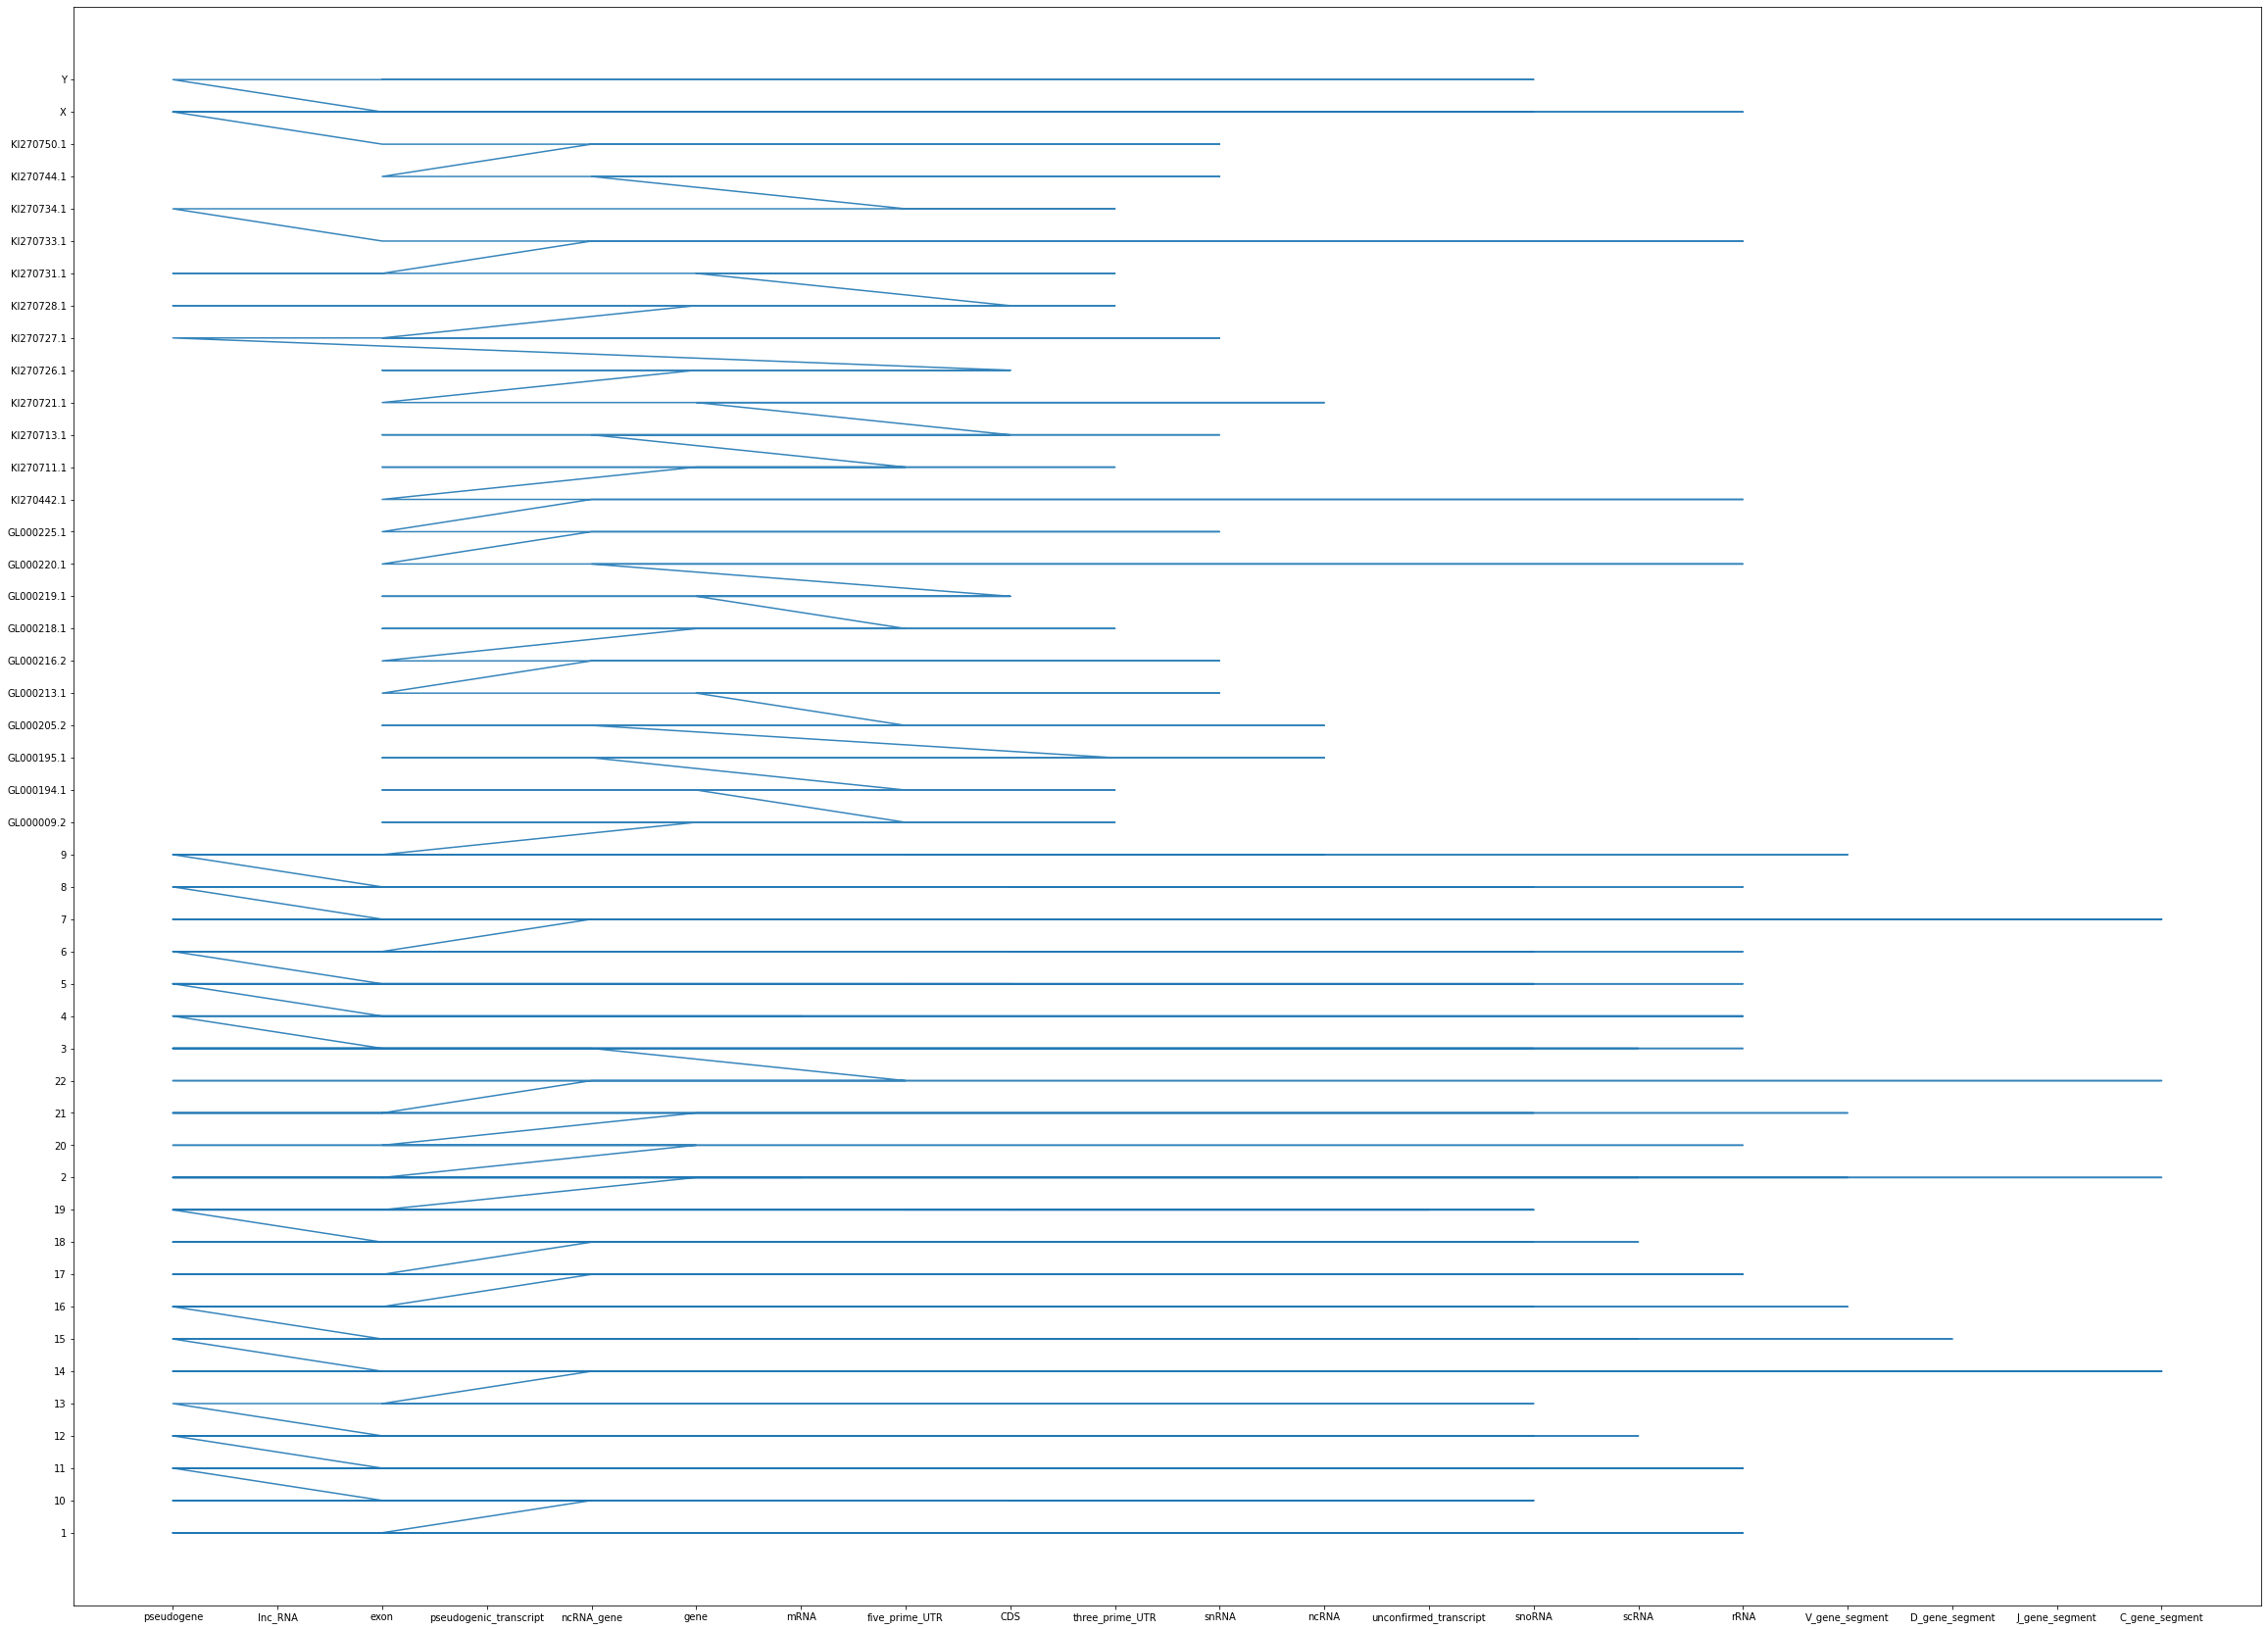

In [ ]:
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(30)
plt.plot(edf.type, edf.seqid, alpha = 0.9)
#plt.show()

No handles with labels found to put in legend.


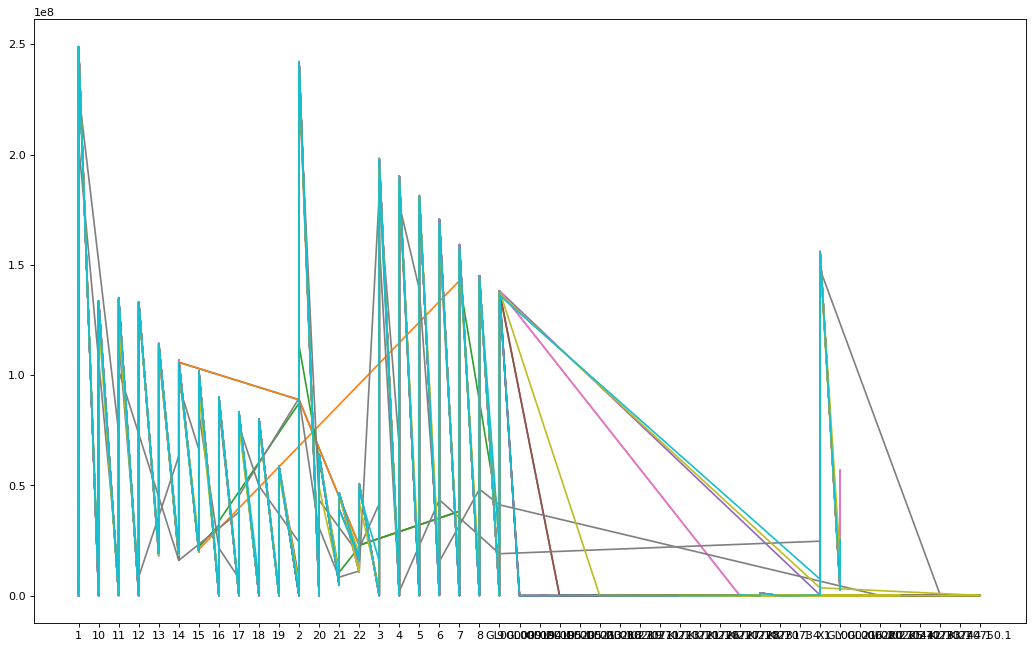

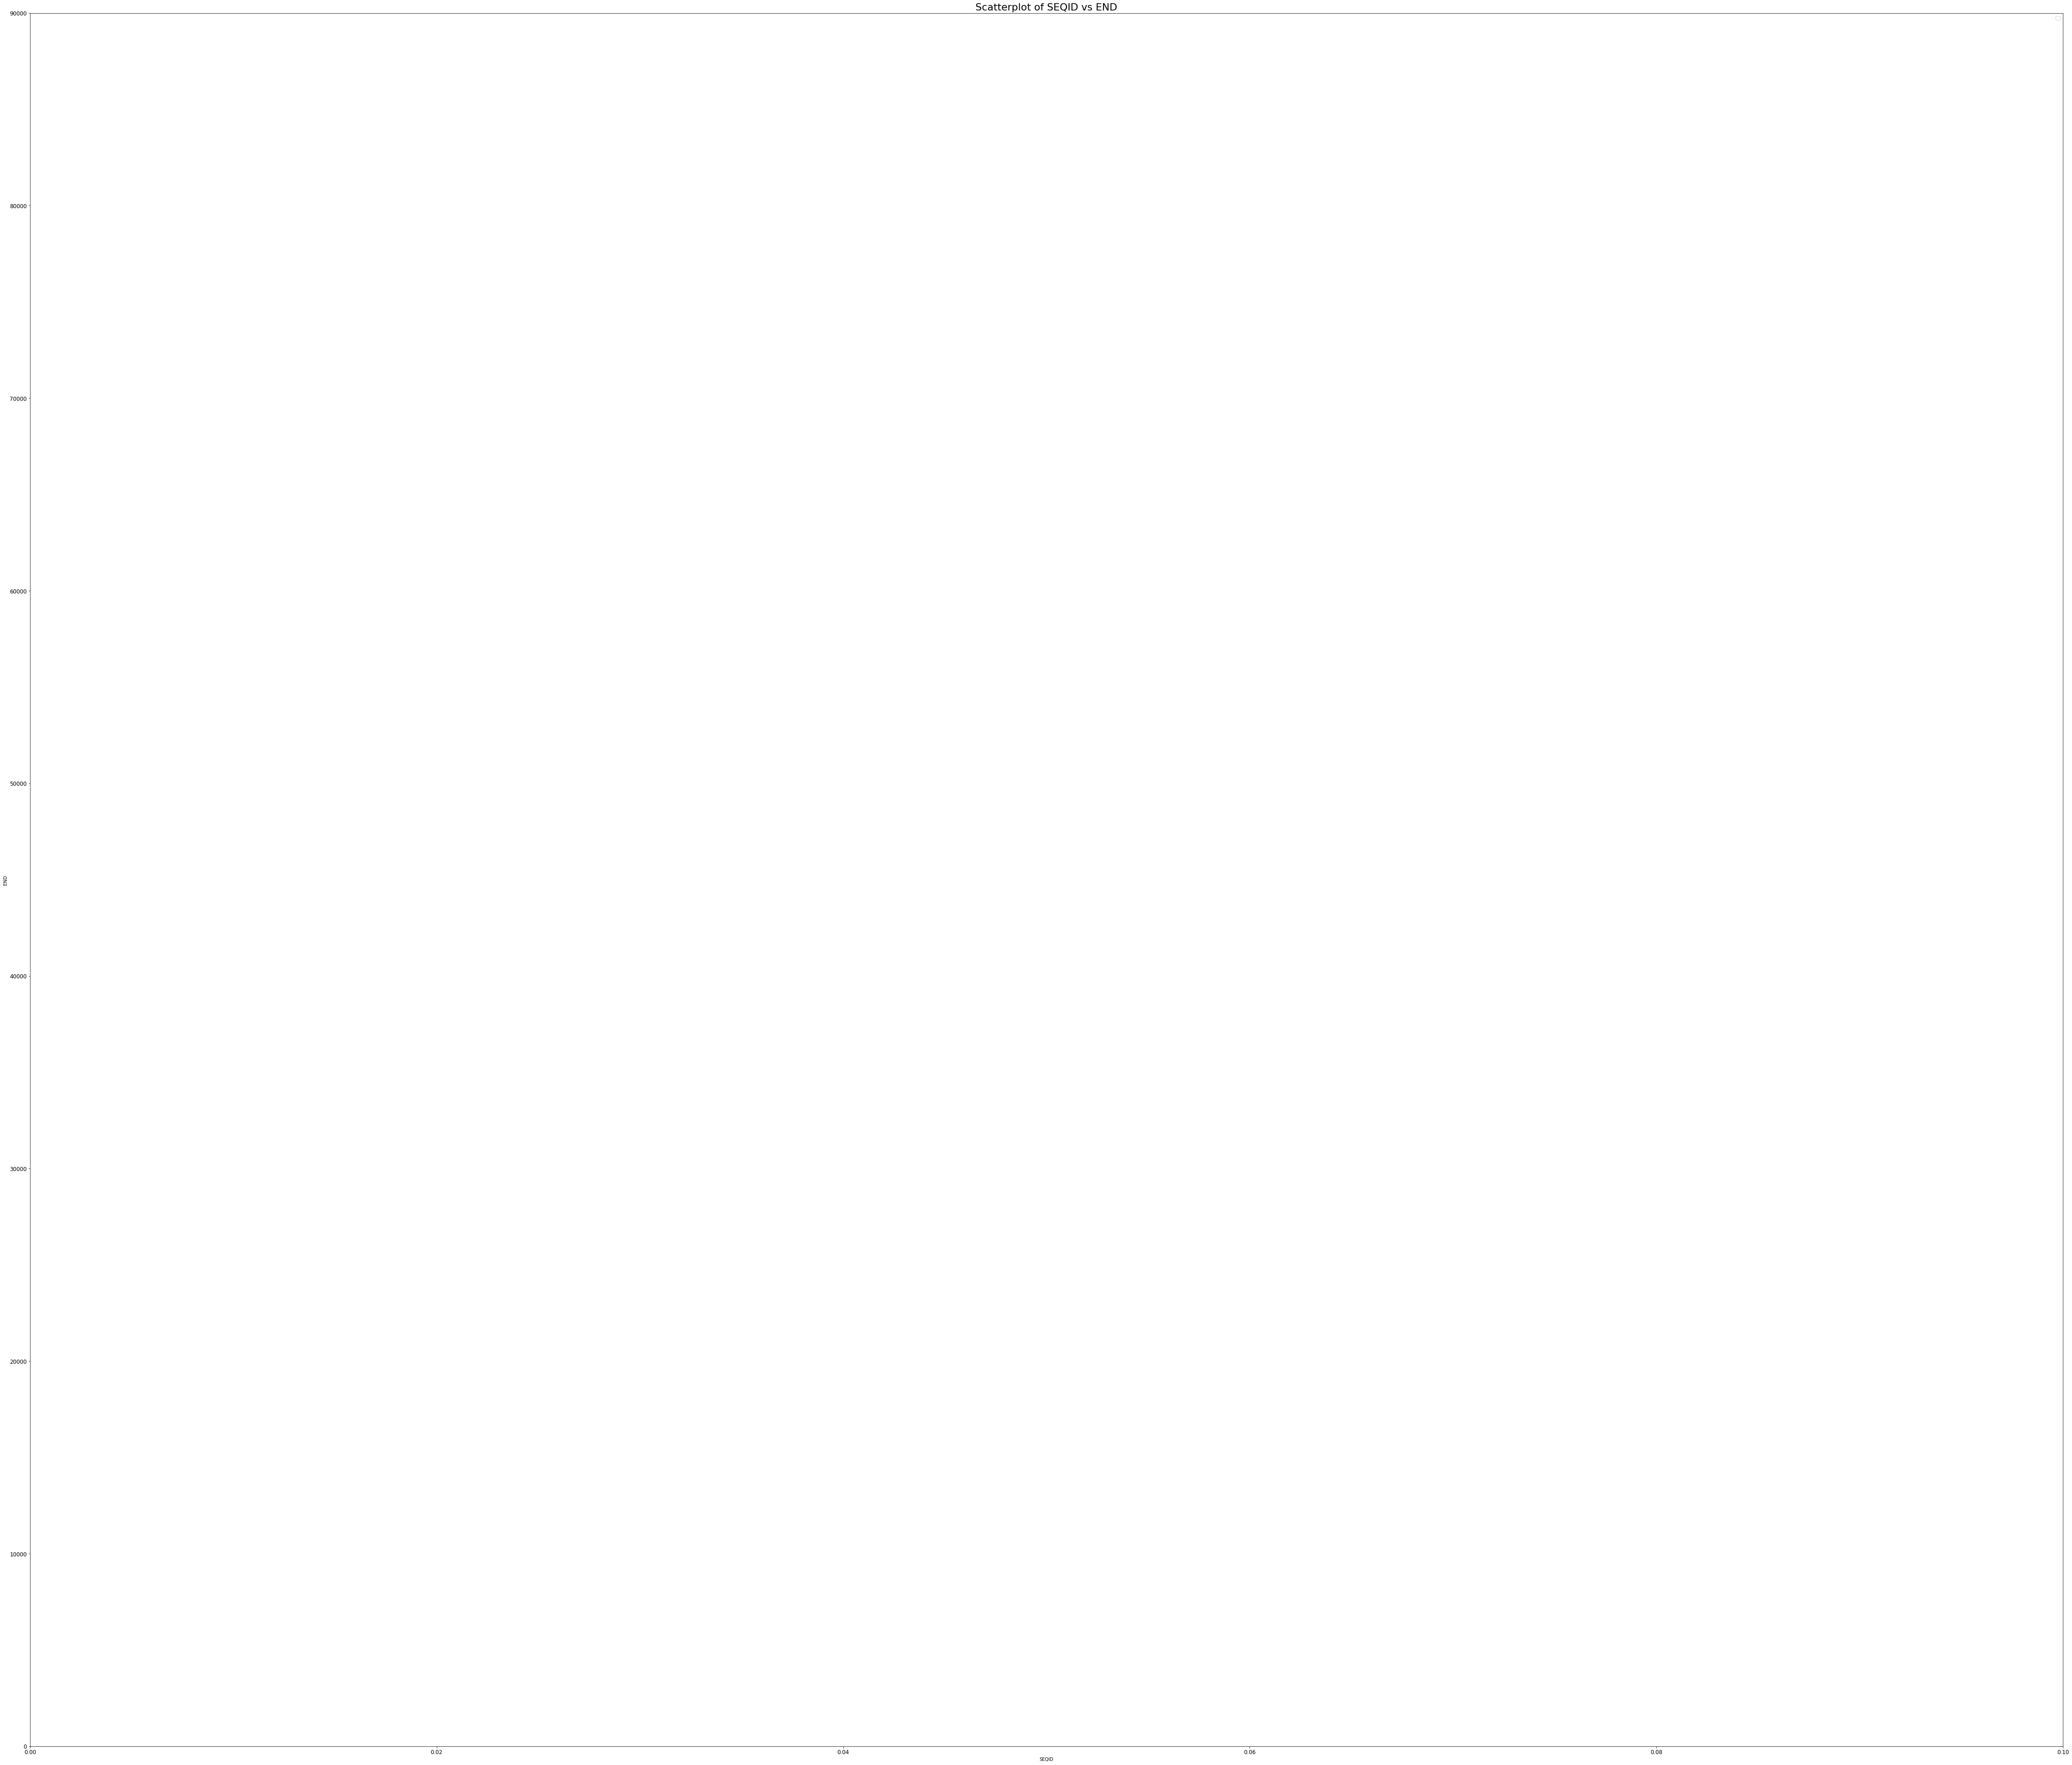

In [ ]:
import numpy as np
categories = np.unique(edf['type'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')


for i, category in enumerate(categories):
    plt.plot('seqid', 'end',
                data=edf.loc[edf.type==category, :],
                  c=colors[i], label=str(category))

# Decorations
f = plt.figure()
f.set_figwidth(80)
f.set_figheight(70)
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='SEQID', ylabel='END')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of SEQID vs END", fontsize=22)
plt.legend(fontsize=12)
plt.show()


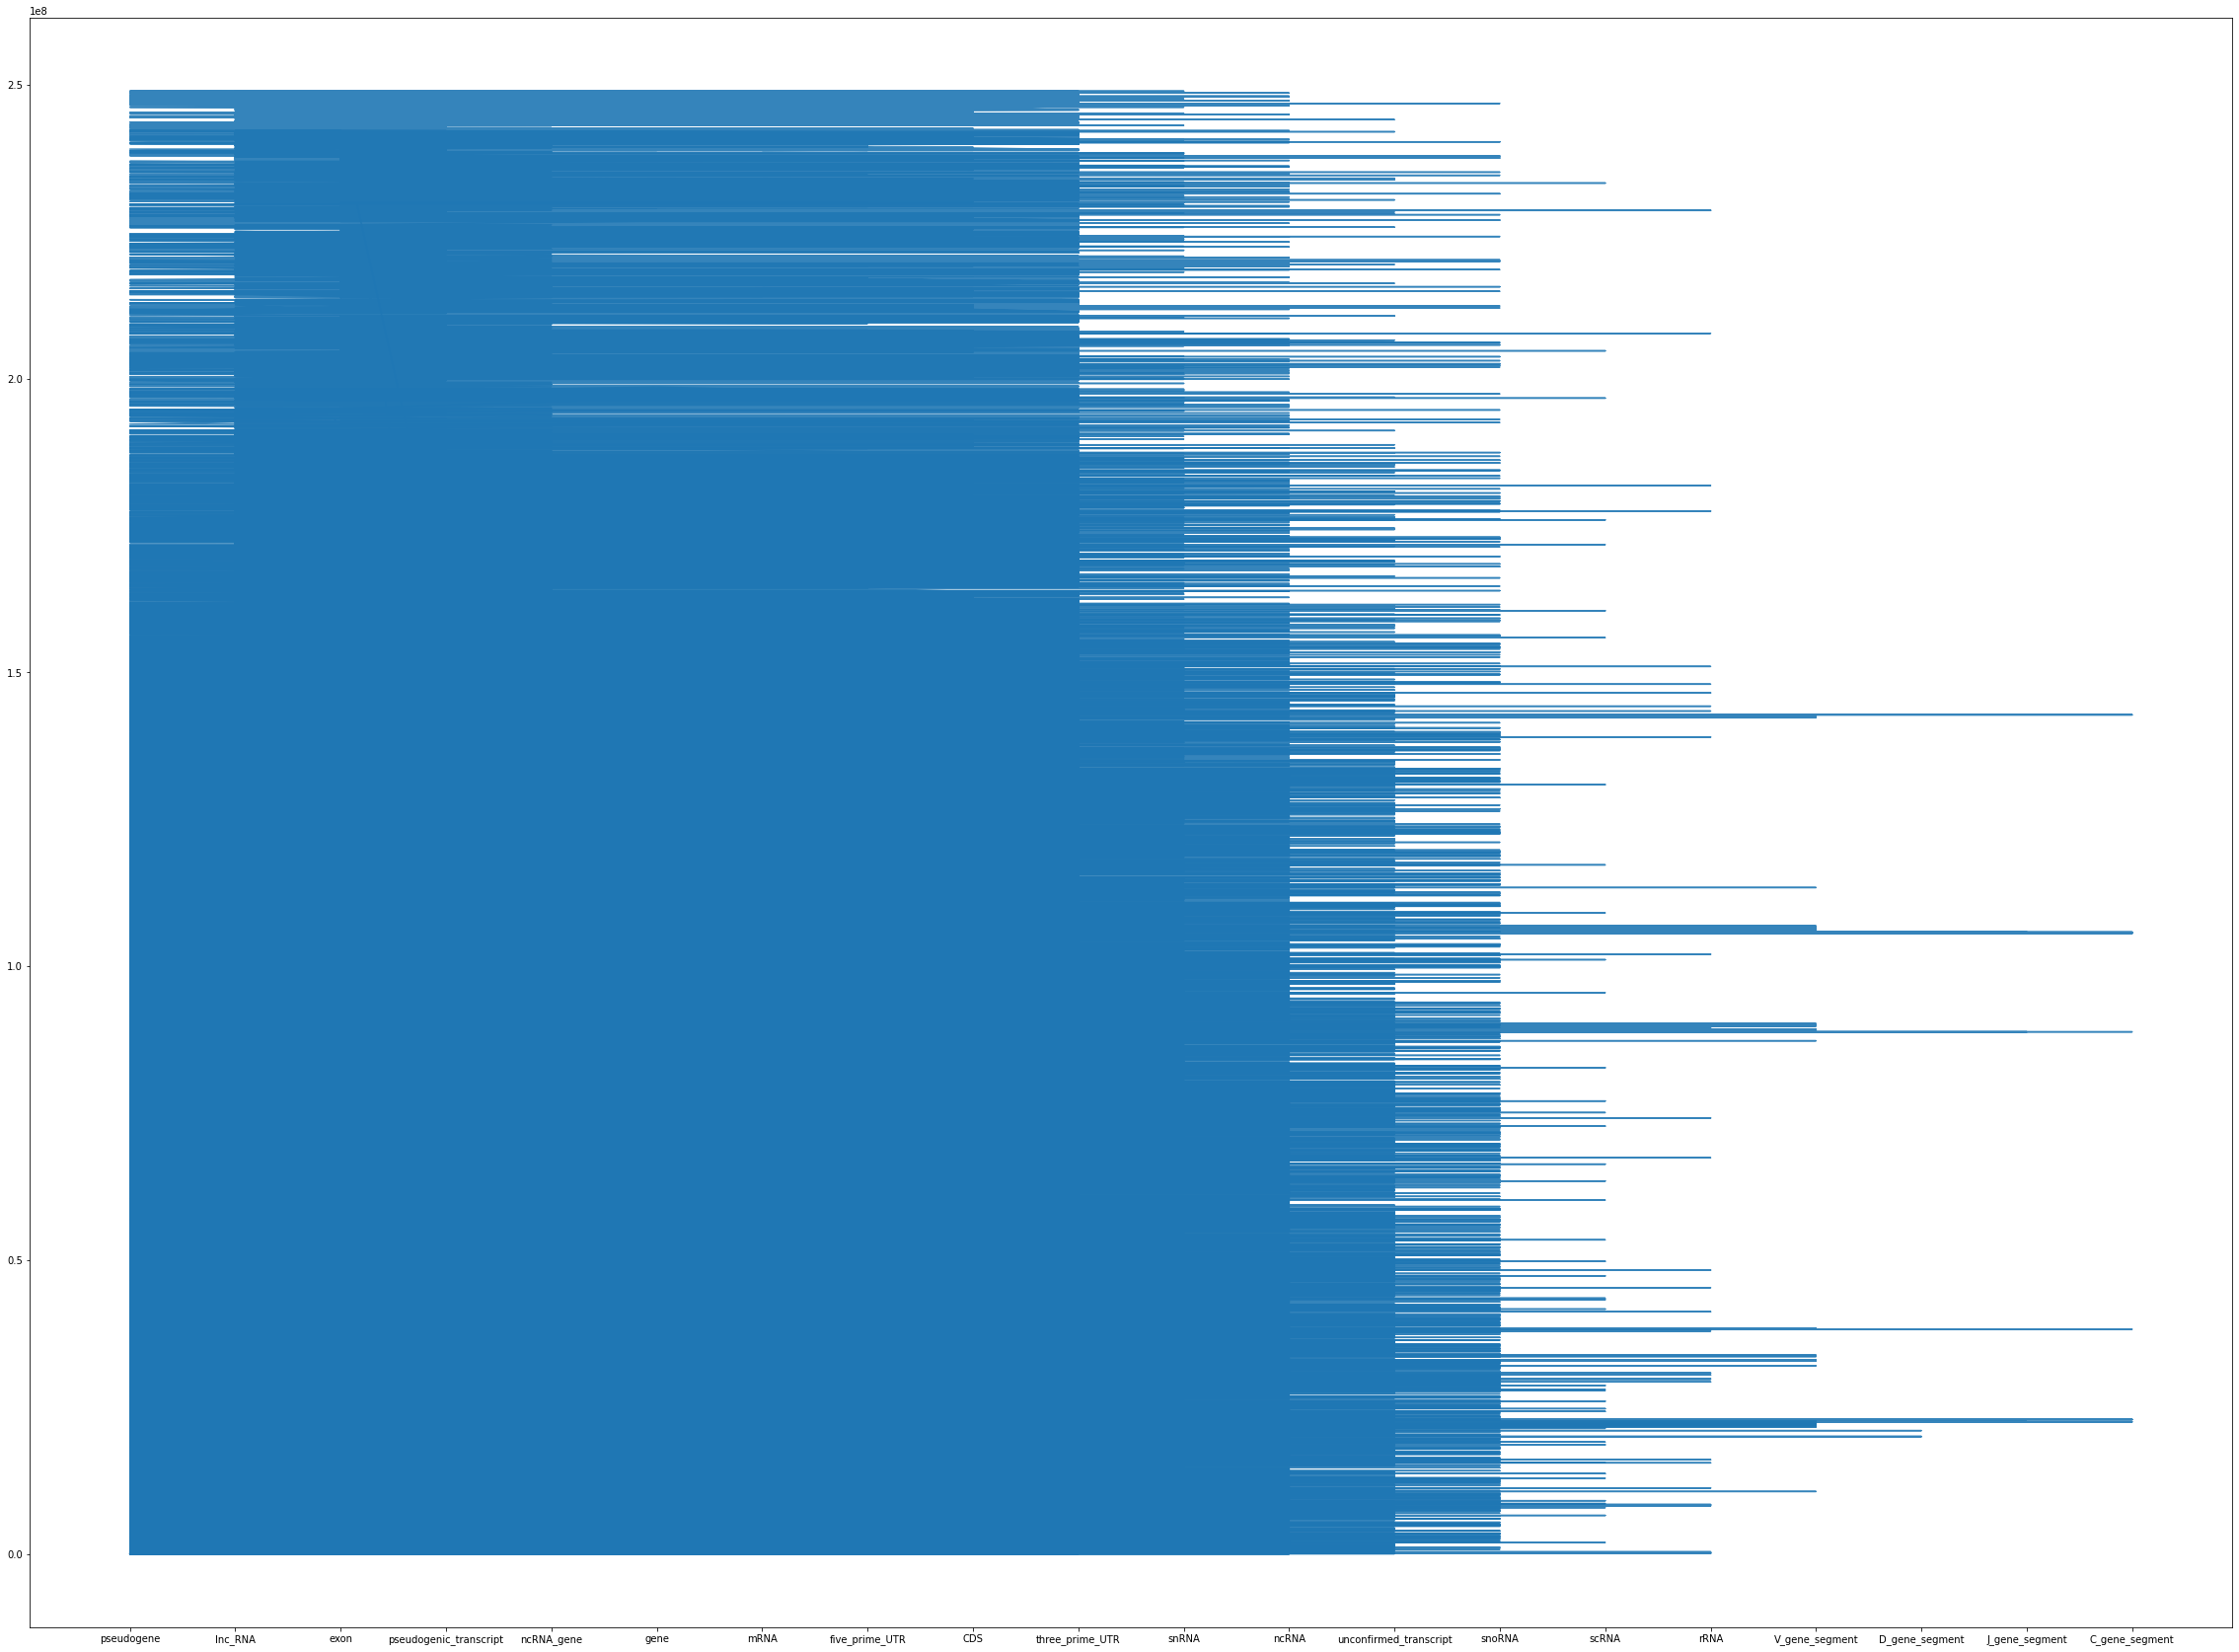

In [ ]:
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(30)
plt.plot(edf.type, edf.end, alpha = 0.9)
#plt.show()

In [ ]:
edf.type.value_counts()

exon                      1397019
CDS                        821639
three_prime_UTR            181403
five_prime_UTR             162619
mRNA                       105370
lnc_RNA                     86426
gene                        21467
ncRNA_gene                  19891
pseudogenic_transcript      15220
pseudogene                  15217
ncRNA                        2220
snRNA                        1915
unconfirmed_transcript       1147
snoRNA                        943
V_gene_segment                251
J_gene_segment                 97
rRNA                           53
scRNA                          50
D_gene_segment                 41
C_gene_segment                 29
Name: type, dtype: int64

In [ ]:
ndf = edf[edf.type=='gene']
ndf = ndf.copy()
ndf.sample(10).attributes.values

array(['ID=gene:ENSG00000143157;Name=POGK;biotype=protein_coding;description=pogo transposable element derived with KRAB domain [Source:HGNC Symbol%3BAcc:HGNC:18800];gene_id=ENSG00000143157;logic_name=ensembl_havana_gene_homo_sapiens;version=12',
       'ID=gene:ENSG00000064787;Name=BCAS1;biotype=protein_coding;description=brain enriched myelin associated protein 1 [Source:HGNC Symbol%3BAcc:HGNC:974];gene_id=ENSG00000064787;logic_name=ensembl_havana_gene_homo_sapiens;version=13',
       'ID=gene:ENSG00000101216;Name=GMEB2;biotype=protein_coding;description=glucocorticoid modulatory element binding protein 2 [Source:HGNC Symbol%3BAcc:HGNC:4371];gene_id=ENSG00000101216;logic_name=ensembl_havana_gene_homo_sapiens;version=11',
       'ID=gene:ENSG00000186334;Name=SLC36A3;biotype=protein_coding;description=solute carrier family 36 member 3 [Source:HGNC Symbol%3BAcc:HGNC:19659];gene_id=ENSG00000186334;logic_name=ensembl_havana_gene_homo_sapiens;version=10',
       'ID=gene:ENSG00000108588;Na

In [ ]:
#extract gene name
import re


RE_GENE_NAME = re.compile(r'Name=(?P<gene_name>.+?);')

print(RE_GENE_NAME)
def extract_gene_name(attributes_str):
    res = RE_GENE_NAME.search(attributes_str)
    #print(res)

    if(res):
        return res.group('gene_name')


ndf['gene_name'] = ndf.attributes.apply(extract_gene_name)

#print(ndf['gene_name'])

re.compile('Name=(?P<gene_name>.+?);')


In [ ]:
RE_GENE_ID = re.compile(r'gene_id=(?P<gene_id>ENSG.+?);')
def extract_gene_id(attributes_str):
    res = RE_GENE_ID.search(attributes_str)
    if(res):
        return res.group('gene_id')


ndf['gene_id'] = ndf.attributes.apply(extract_gene_id)


RE_DESC = re.compile('description=(?P<desc>.+?);')
def extract_description(attributes_str):
    res = RE_DESC.search(attributes_str)
    if res is None:
        return ''
    else:
        return res.group('desc')


ndf['desc'] = ndf.attributes.apply(extract_description)


In [ ]:
#drop attributes column
ndf.drop('attributes', axis=1, inplace=True)

In [ ]:
ndf.head()

seqid  ...                                               desc
82       1  ...  olfactory receptor family 4 subfamily F member...
370      1  ...  olfactory receptor family 4 subfamily F member...
499      1  ...  olfactory receptor family 4 subfamily F member...
979      1  ...  sterile alpha motif domain containing 11 [Sour...
1341     1  ...  NOC2 like nucleolar associated transcriptional...

[5 rows x 14 columns]

In [ ]:
#plt.plot(ndf.type, ndf.seqid, alpha = 0.9)
#plt.show()

In [ ]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21467 entries, 82 to 3150206
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   seqid      21467 non-null  object
 1   source     21467 non-null  object
 2   type       21467 non-null  object
 3   start      21467 non-null  int64 
 4   end        21467 non-null  int64 
 5   score      21467 non-null  object
 6   strand     21467 non-null  object
 7   phase      21467 non-null  object
 8   Parent     0 non-null      object
 9   Name       19821 non-null  object
 10  ID         21467 non-null  object
 11  gene_name  19821 non-null  object
 12  gene_id    21467 non-null  object
 13  desc       21467 non-null  object
dtypes: int64(2), object(12)
memory usage: 2.5+ MB


In [ ]:
ndf.shape

(21467, 14)

In [ ]:
#unique gene id's
ndf.gene_id.unique().shape

(21467,)

In [ ]:
#unique gene names
ndf.gene_name.unique().shape

(19815,)

In [ ]:
#gene names are less than gene ids which means more than one gene id is associated with a gene name
count_df = ndf.groupby('gene_name').count().iloc[:, 0].sort_values().iloc[::-1]

In [ ]:
count_df.head()

gene_name
SIGLEC5    2
PINX1      2
PDE11A     2
POLR2J3    2
MATR3      2
Name: seqid, dtype: int64

In [ ]:
count_df[count_df > 1].shape

(7,)

In [ ]:
count_df[count_df > 1].shape[0] / count_df.shape[0]

0.0003532855556677097

In [ ]:
ndf[ndf.gene_name == 'OR4F16']

seqid  ...                                               desc
499     1  ...  olfactory receptor family 4 subfamily F member...

[1 rows x 14 columns]

In [ ]:
#length of a gene
ndf['length'] = ndf.end - ndf.start + 1


In [ ]:
ndf['length']

82          6167
370          939
499          995
979        20653
1341       15107
           ...  
3149435    31648
3149501    50424
3149616    73198
3150014    31648
3150206     2741
Name: length, Length: 21467, dtype: int64

In [ ]:
ndf[ndf.length > 2e6].sort_values('length').iloc[::-1]

seqid  ...   length
1083470    16  ...  2473539
2788117     7  ...  2304997
2927386     9  ...  2298757
3058477     X  ...  2241933
545424     11  ...  2172911
2805571     8  ...  2059620
1870698    20  ...  2057829

[7 rows x 15 columns]

In [ ]:
ndf.sort_values('length').head()

seqid  ... length
833303     14  ...      8
833307     14  ...      9
937849     14  ...     11
2785341     7  ...     12
833311     14  ...     13

[5 rows x 15 columns]

In [ ]:
import seaborn as sns

In [ ]:
#gene distribution among chromosomes
ndf = ndf[ndf.seqid.isin(chrs)]
chr_gene_counts = ndf.groupby('seqid').count().iloc[:, 0].sort_values().iloc[::-1]

In [ ]:
chr_gene_counts.head

<bound method NDFrame.head of seqid
1     2090
19    1545
11    1396
2     1350
17    1283
12    1133
3     1102
6     1084
7     1041
16     992
5      954
X      872
14     838
9      797
4      789
10     759
8      715
15     658
20     555
22     505
13     351
18     319
21     264
Y       46
Name: source, dtype: int64>

In [ ]:
df[(df.type == 'mRNA') & (df.seqid == '1')].count()

seqid         9221
source        9221
type          9221
start         9221
end           9221
score         9221
strand        9221
phase         9221
attributes    9221
dtype: int64

In [ ]:
ndf.seqid.unique()

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '3', '4', '5', '6', '7', '8', '9',
       'GL000009.2', 'GL000194.1', 'GL000195.1', 'GL000205.2',
       'GL000213.1', 'GL000218.1', 'GL000219.1', 'KI270711.1',
       'KI270713.1', 'KI270721.1', 'KI270726.1', 'KI270727.1',
       'KI270728.1', 'KI270731.1', 'KI270734.1', 'X', 'Y'], dtype=object)

In [ ]:
seqids = ndf.seqid.unique()
ids = []
for i in seqids:
    ids.append(i)

chr = {}
t={}
sub=[]
for k  in ids:
    k1 = ndf[ndf.seqid == k]
    chr[k] =k1.type.unique()

t=[]
r={}
for k,v in chr.items():
    temp2 ={}
    for i in v:
        temp2[i] = 'leaf'
    r[k] = temp2





r


NameError: ignored

In [ ]:

chromosomeToElements = {}
for key,value in data.items():
    chromosomeToElements[key] = value.type.unique()
    #chromosomeToElements['value'] =value.type.unique()
    #print(key ,value.type.unique())

#chromosomeToElements.values()

In [ ]:
val=[]
d2 = {}
for key,value in chromosomeToElements.items():
            k = chromosomeToElements.keys()
            vals=chromosomeToElements.values()
for key, values in chromosomeToElements.items():
        if key not in d2:
            d2[key] = {}

        for leaf in values:
               d2[key][leaf] = df[(df.type == leaf) & (df.seqid == key)]


#d2
#df[(df.type == 'CDS') & (df.seqid == '1')].count()


In [ ]:
d2

{'1': {'CDS':        seqid  ...                                         attributes
  88         1  ...  ID=CDS:ENSP00000493376;Parent=transcript:ENST0...
  89         1  ...  ID=CDS:ENSP00000493376;Parent=transcript:ENST0...
  373        1  ...  ID=CDS:ENSP00000409316;Parent=transcript:ENST0...
  503        1  ...  ID=CDS:ENSP00000329982;Parent=transcript:ENST0...
  983        1  ...  ID=CDS:ENSP00000478421;Parent=transcript:ENST0...
  ...      ...  ...                                                ...
  287166     1  ...  ID=CDS:ENSP00000431338;Parent=transcript:ENST0...
  287167     1  ...  ID=CDS:ENSP00000431338;Parent=transcript:ENST0...
  287225     1  ...  ID=CDS:ENSP00000355424;Parent=transcript:ENST0...
  287232     1  ...  ID=CDS:ENSP00000331643;Parent=transcript:ENST0...
  287233     1  ...  ID=CDS:ENSP00000331643;Parent=transcript:ENST0...
  
  [77045 rows x 9 columns],
  'exon':        seqid   source  ... phase                                         attributes
  18       

In [ ]:
df[(df.type == 'CDS') & (df.seqid == '1')].count()
genome={}
genome['root'] = d2

genome

{'root': {'1': {'CDS':        seqid  ...                                         attributes
   88         1  ...  ID=CDS:ENSP00000493376;Parent=transcript:ENST0...
   89         1  ...  ID=CDS:ENSP00000493376;Parent=transcript:ENST0...
   373        1  ...  ID=CDS:ENSP00000409316;Parent=transcript:ENST0...
   503        1  ...  ID=CDS:ENSP00000329982;Parent=transcript:ENST0...
   983        1  ...  ID=CDS:ENSP00000478421;Parent=transcript:ENST0...
   ...      ...  ...                                                ...
   287166     1  ...  ID=CDS:ENSP00000431338;Parent=transcript:ENST0...
   287167     1  ...  ID=CDS:ENSP00000431338;Parent=transcript:ENST0...
   287225     1  ...  ID=CDS:ENSP00000355424;Parent=transcript:ENST0...
   287232     1  ...  ID=CDS:ENSP00000331643;Parent=transcript:ENST0...
   287233     1  ...  ID=CDS:ENSP00000331643;Parent=transcript:ENST0...
   
   [77045 rows x 9 columns],
   'exon':        seqid   source  ... phase                                        

In [ ]:
genesInChr1 = df[(df.type == 'gene') & (df.seqid == '1')]
genesInChr1.head()

seqid  ...                                         attributes
82       1  ...  ID=gene:ENSG00000186092;Name=OR4F5;biotype=pro...
370      1  ...  ID=gene:ENSG00000284733;Name=OR4F29;biotype=pr...
499      1  ...  ID=gene:ENSG00000284662;Name=OR4F16;biotype=pr...
979      1  ...  ID=gene:ENSG00000187634;Name=SAMD11;biotype=pr...
1341     1  ...  ID=gene:ENSG00000188976;Name=NOC2L;biotype=pro...

[5 rows x 9 columns]

In [ ]:
def myprint(d):
    for k, v in d.items():

        print(k,":")

        if isinstance(v, dict):
            myprint(v)
        else:
            print("{0} : {1}".format(k, v))




In [ ]:
from munch import Munch
undefined = object()
b = Munch(genome)

b.root['X']

In [ ]:
import networkx as nx
G = nx.Graph()

In [ ]:
chromosomeToElements

{'1': array(['pseudogene', 'lnc_RNA', 'exon', 'pseudogenic_transcript',
        'ncRNA_gene', 'gene', 'mRNA', 'five_prime_UTR', 'CDS',
        'three_prime_UTR', 'snRNA', 'ncRNA', 'unconfirmed_transcript',
        'snoRNA', 'scRNA', 'rRNA'], dtype=object),
 '10': array(['ncRNA_gene', 'lnc_RNA', 'exon', 'pseudogene',
        'pseudogenic_transcript', 'gene', 'mRNA', 'three_prime_UTR', 'CDS',
        'five_prime_UTR', 'ncRNA', 'snRNA', 'snoRNA',
        'unconfirmed_transcript'], dtype=object),
 '11': array(['pseudogene', 'pseudogenic_transcript', 'exon', 'ncRNA_gene',
        'lnc_RNA', 'snRNA', 'gene', 'mRNA', 'three_prime_UTR', 'CDS',
        'five_prime_UTR', 'ncRNA', 'unconfirmed_transcript', 'snoRNA',
        'scRNA', 'rRNA'], dtype=object),
 '12': array(['pseudogene', 'pseudogenic_transcript', 'exon', 'ncRNA_gene',
        'lnc_RNA', 'gene', 'mRNA', 'five_prime_UTR', 'CDS',
        'three_prime_UTR', 'snRNA', 'unconfirmed_transcript', 'ncRNA',
        'snoRNA', 'scRNA'], dtype=obj

In [ ]:
genes={}

genes['1'] = ndf[(ndf.type == 'gene') & (ndf.seqid == '1')]

genes['2'] = ndf[(ndf.type == 'gene') & (ndf.seqid == '2')]

genes['3'] = ndf[(ndf.type == 'gene') & (ndf.seqid == '3')]


genes['4'] = ndf[(ndf.type == 'gene') & (ndf.seqid == '4')]

genes['5'] = ndf[(ndf.type == 'gene') & (ndf.seqid == '5')]

genes['6'] = ndf[(ndf.type == 'gene') & (ndf.seqid == '6')]


genes['7'] = ndf[(ndf.type == 'gene') & (ndf.seqid == '7')]

genes['8'] = ndf[(ndf.type == 'gene') & (ndf.seqid == '8')]

genes['9'] = ndf[(ndf.type == 'gene') & (ndf.seqid == '9')]


genes['10'] = ndf[(ndf.type == 'gene') & (ndf.seqid == '10')]

genes['11'] = ndf[(ndf.type == 'gene') & (ndf.seqid == '11')]

genes['12'] = ndf[(ndf.type == 'gene') & (ndf.seqid == '12')]

genes['13'] = ndf[(ndf.type == 'gene') & (ndf.seqid == '13')]

genes['14'] = ndf[(ndf.type == 'gene') & (ndf.seqid == '14')]

genes['15'] = ndf[(ndf.type == 'gene') & (ndf.seqid == '15')]

genes['16'] = ndf[(ndf.type == 'gene') & (ndf.seqid == '16')]

genes['17'] = ndf[(ndf.type == 'gene') & (ndf.seqid == '17')]

genes['18'] = ndf[(ndf.type == 'gene') & (ndf.seqid == '18')]

genes['19'] = ndf[(ndf.type == 'gene') & (ndf.seqid == '19')]

genes['20'] = ndf[(ndf.type == 'gene') & (ndf.seqid == '20')]

genes['21'] = ndf[(ndf.type == 'gene') & (ndf.seqid == '21')]
genes['22'] = ndf[(ndf.type == 'gene') & (ndf.seqid == '22')]

genes['X'] = ndf[(ndf.type == 'gene') & (ndf.seqid == 'X')]

genes['Y'] = ndf[(ndf.type == 'gene') & (ndf.seqid == 'Y')]

genes['MT'] = ndf[(ndf.type == 'gene') & (ndf.seqid == 'MT')]


genes.values()

dict_values([       seqid  ... length
82         1  ...   6167
370        1  ...    939
499        1  ...    995
979        1  ...  20653
1341       1  ...  15107
...      ...  ...    ...
286737     1  ...  16345
286758     1  ...  15470
286805     1  ...  11308
286875     1  ...   9139
287217     1  ...  13751

[2090 rows x 13 columns],         seqid  ... length
1617625     2  ...   8057
1617680     2  ...  48669
1618045     2  ...  14144
1618198     2  ...   9294
1618632     2  ...  13530
...       ...  ...    ...
1856690     2  ...   8349
1856852     2  ...   9011
1856887     2  ...   4224
1856933     2  ...   8564
1856994     2  ...   4805

[1350 rows x 13 columns],         seqid  ...  length
2034583     3  ...  212655
2035014     3  ...  311560
2035221     3  ...  959147
2035591     3  ...   60290
2035829     3  ...   23947
...       ...  ...     ...
2230806     3  ...   50418
2230972     3  ...   97211
2231340     3  ...   71066
2231477     3  ...    6421
2231572     3  ...   835

In [ ]:
ndf.head()

seqid  ... length
82       1  ...   6167
370      1  ...    939
499      1  ...    995
979      1  ...  20653
1341     1  ...  15107

[5 rows x 13 columns]

In [ ]:
seqids = df.seqid.unique()
ids = []
for i in seqids:
    ids.append(i)

In [ ]:
chr = {}
t={}
sub=[]
for k  in ids:
    k1 = df[df.seqid == k]
    chr[k] =k1.type.unique()




In [ ]:
t=[]
r={}
for k,v in chr.items():
    temp2 ={}
    for i in v:
        temp2[i] = 'leaf'
    r[k] = temp2





r

{'1': {'CDS': '',
  'biological_region': '',
  'chromosome': '',
  'exon': '',
  'five_prime_UTR': '',
  'gene': '',
  'lnc_RNA': '',
  'mRNA': '',
  'miRNA': '',
  'ncRNA': '',
  'ncRNA_gene': '',
  'pseudogene': '',
  'pseudogenic_transcript': '',
  'rRNA': '',
  'scRNA': '',
  'snRNA': '',
  'snoRNA': '',
  'three_prime_UTR': '',
  'unconfirmed_transcript': ''},
 '10': {'CDS': '',
  'biological_region': '',
  'chromosome': '',
  'exon': '',
  'five_prime_UTR': '',
  'gene': '',
  'lnc_RNA': '',
  'mRNA': '',
  'miRNA': '',
  'ncRNA': '',
  'ncRNA_gene': '',
  'pseudogene': '',
  'pseudogenic_transcript': '',
  'snRNA': '',
  'snoRNA': '',
  'three_prime_UTR': '',
  'unconfirmed_transcript': ''},
 '11': {'CDS': '',
  'biological_region': '',
  'chromosome': '',
  'exon': '',
  'five_prime_UTR': '',
  'gene': '',
  'lnc_RNA': '',
  'mRNA': '',
  'miRNA': '',
  'ncRNA': '',
  'ncRNA_gene': '',
  'pseudogene': '',
  'pseudogenic_transcript': '',
  'rRNA': '',
  'scRNA': '',
  'snRNA': '

In [ ]:
import networkx as nx
G = nx.Graph()
g3 = nx.from_dict_of_dicts(genome, multigraph_input=True, create_using=G)


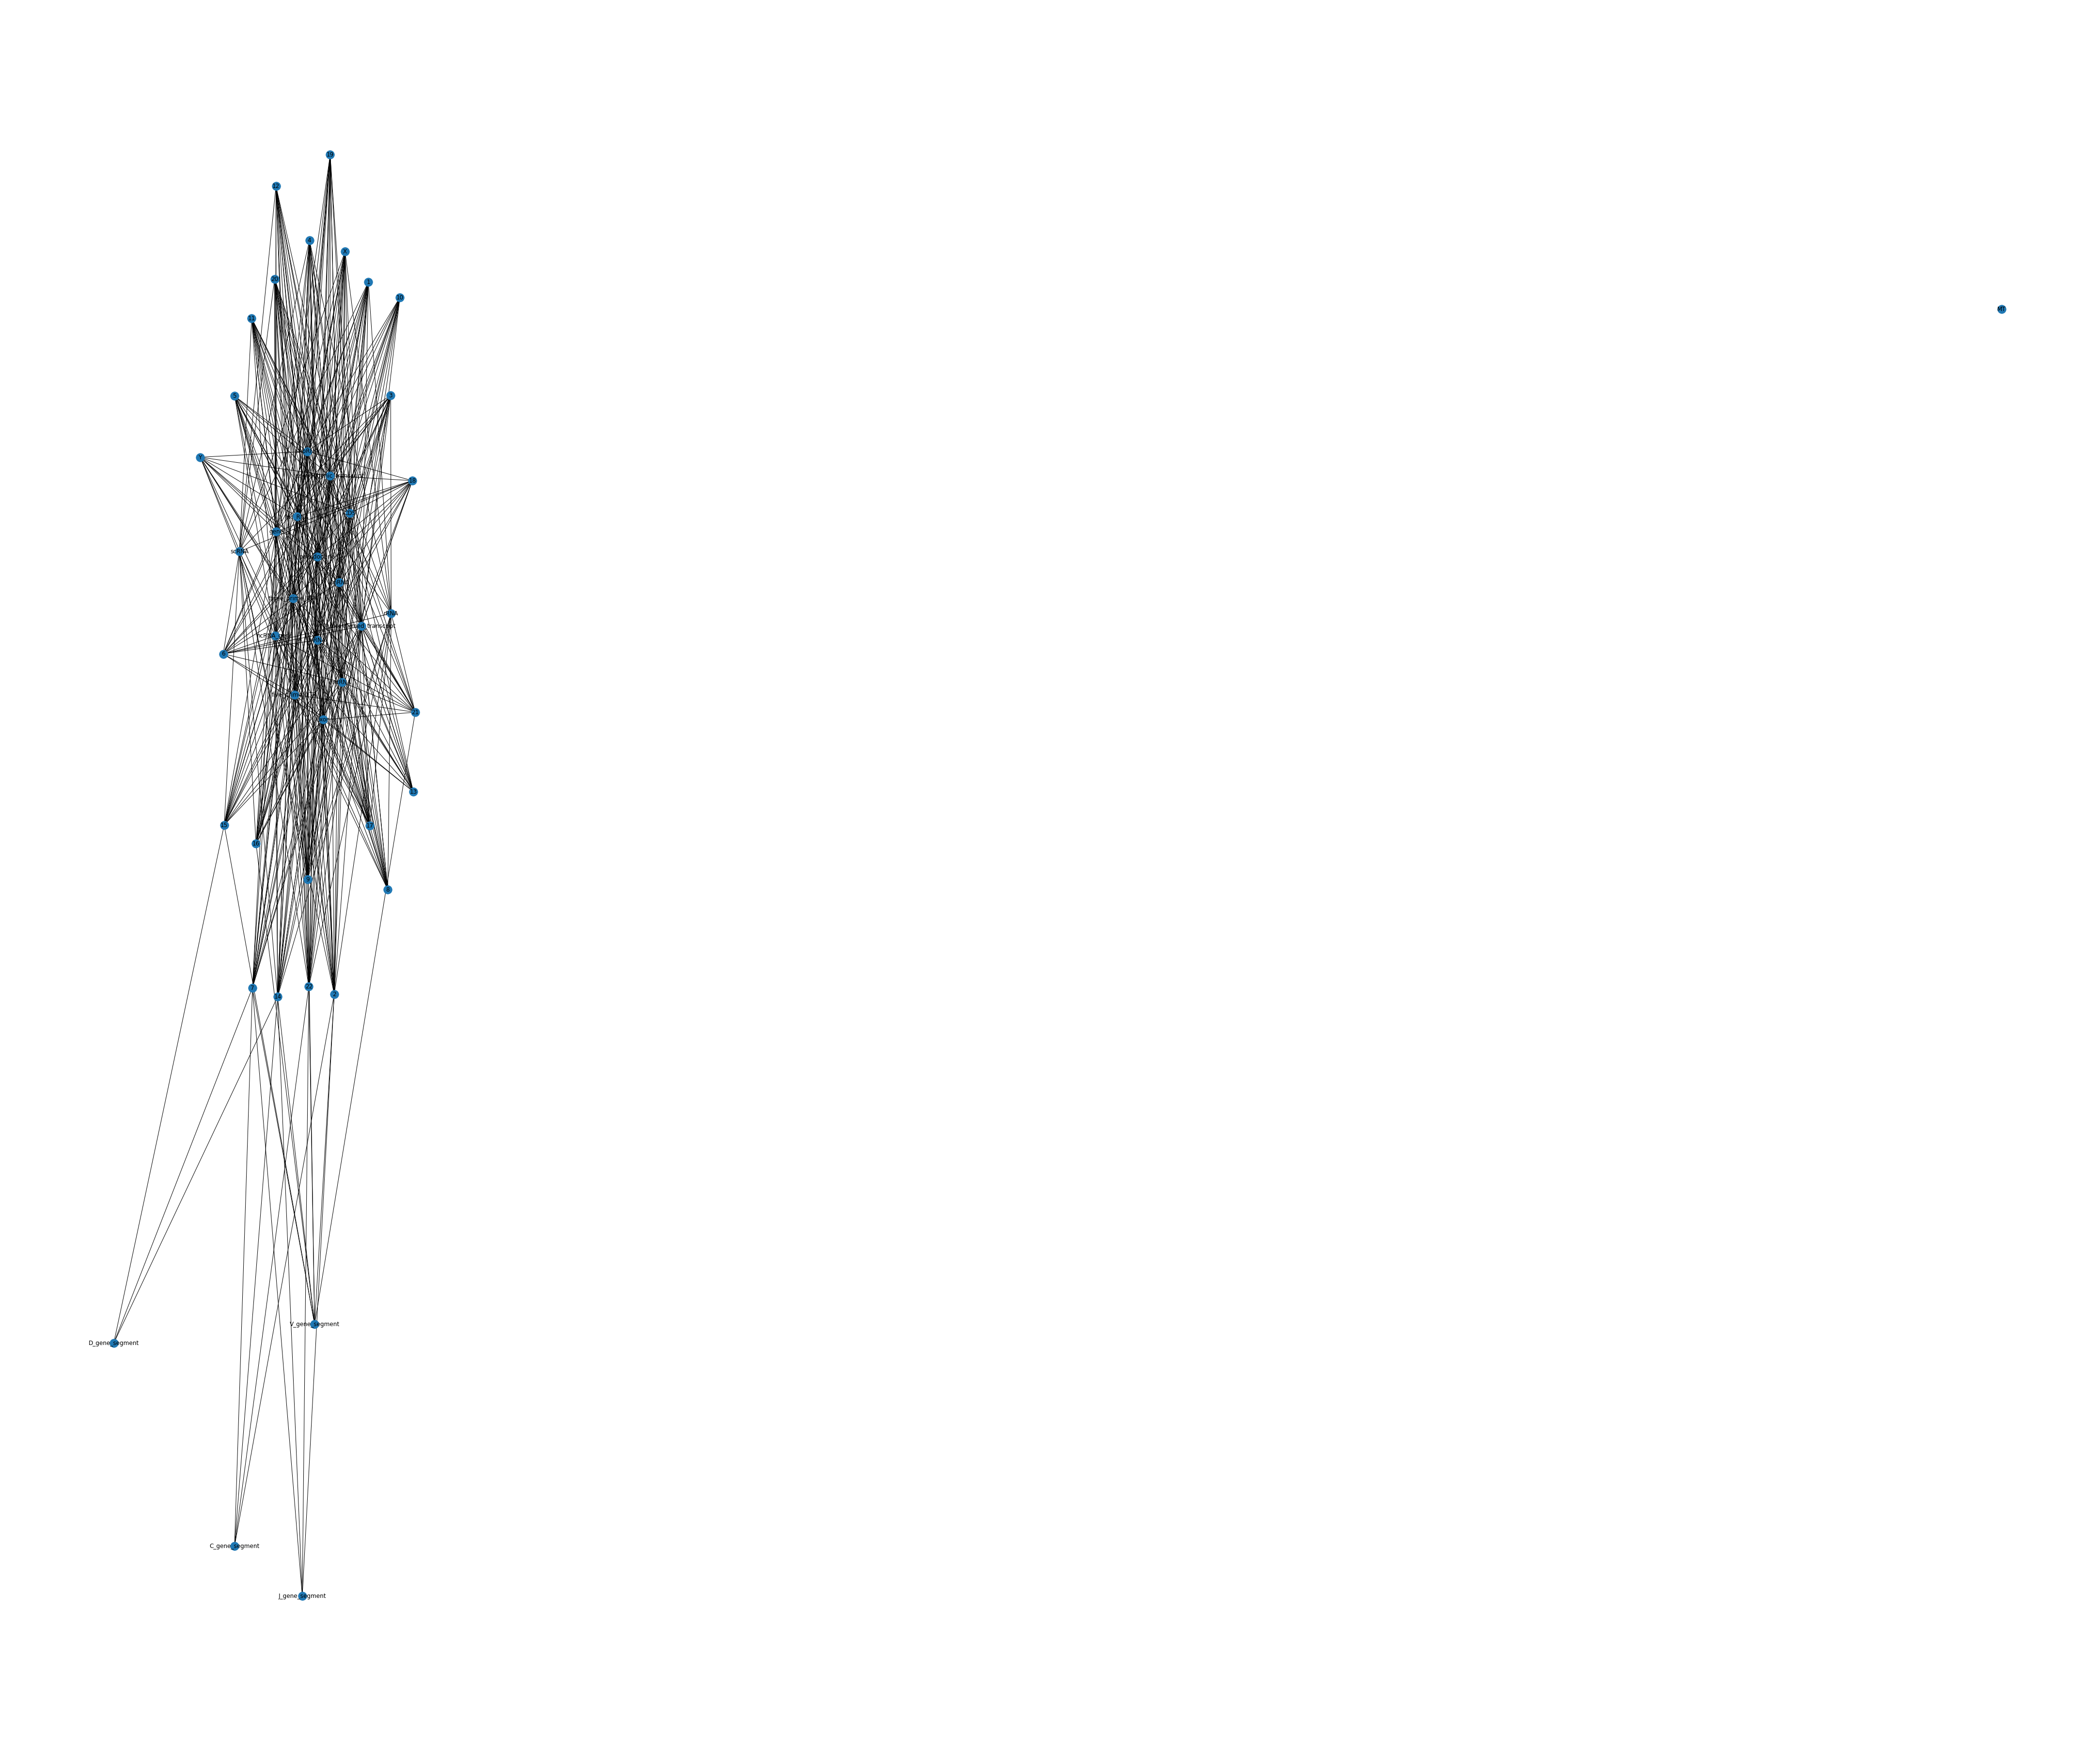

In [ ]:
#genest={}
#geneids = ndf.gene_id

#for id in geneids:
 #   genes = ndf[(ndf.type == 'gene') & (ndf.gene_id == id)]
  #  genest[id] = {'seqid':genes.seqid,'gene Name':genes.gene_name, 'start': genes.start , 'End' : genes.end ,
   #               'length' : genes.length , 'Description' : genes.desc}


#genest

f = plt.figure()
f.set_figwidth(60)
f.set_figheight(50)
nx.draw(g3, with_labels = True)
plt.savefig("nx1.pdf")



In [ ]:
import networkx as nx
G = nx.MultiDiGraph()
g4 = nx.from_dict_of_dicts(d2, multigraph_input=True, create_using=G)


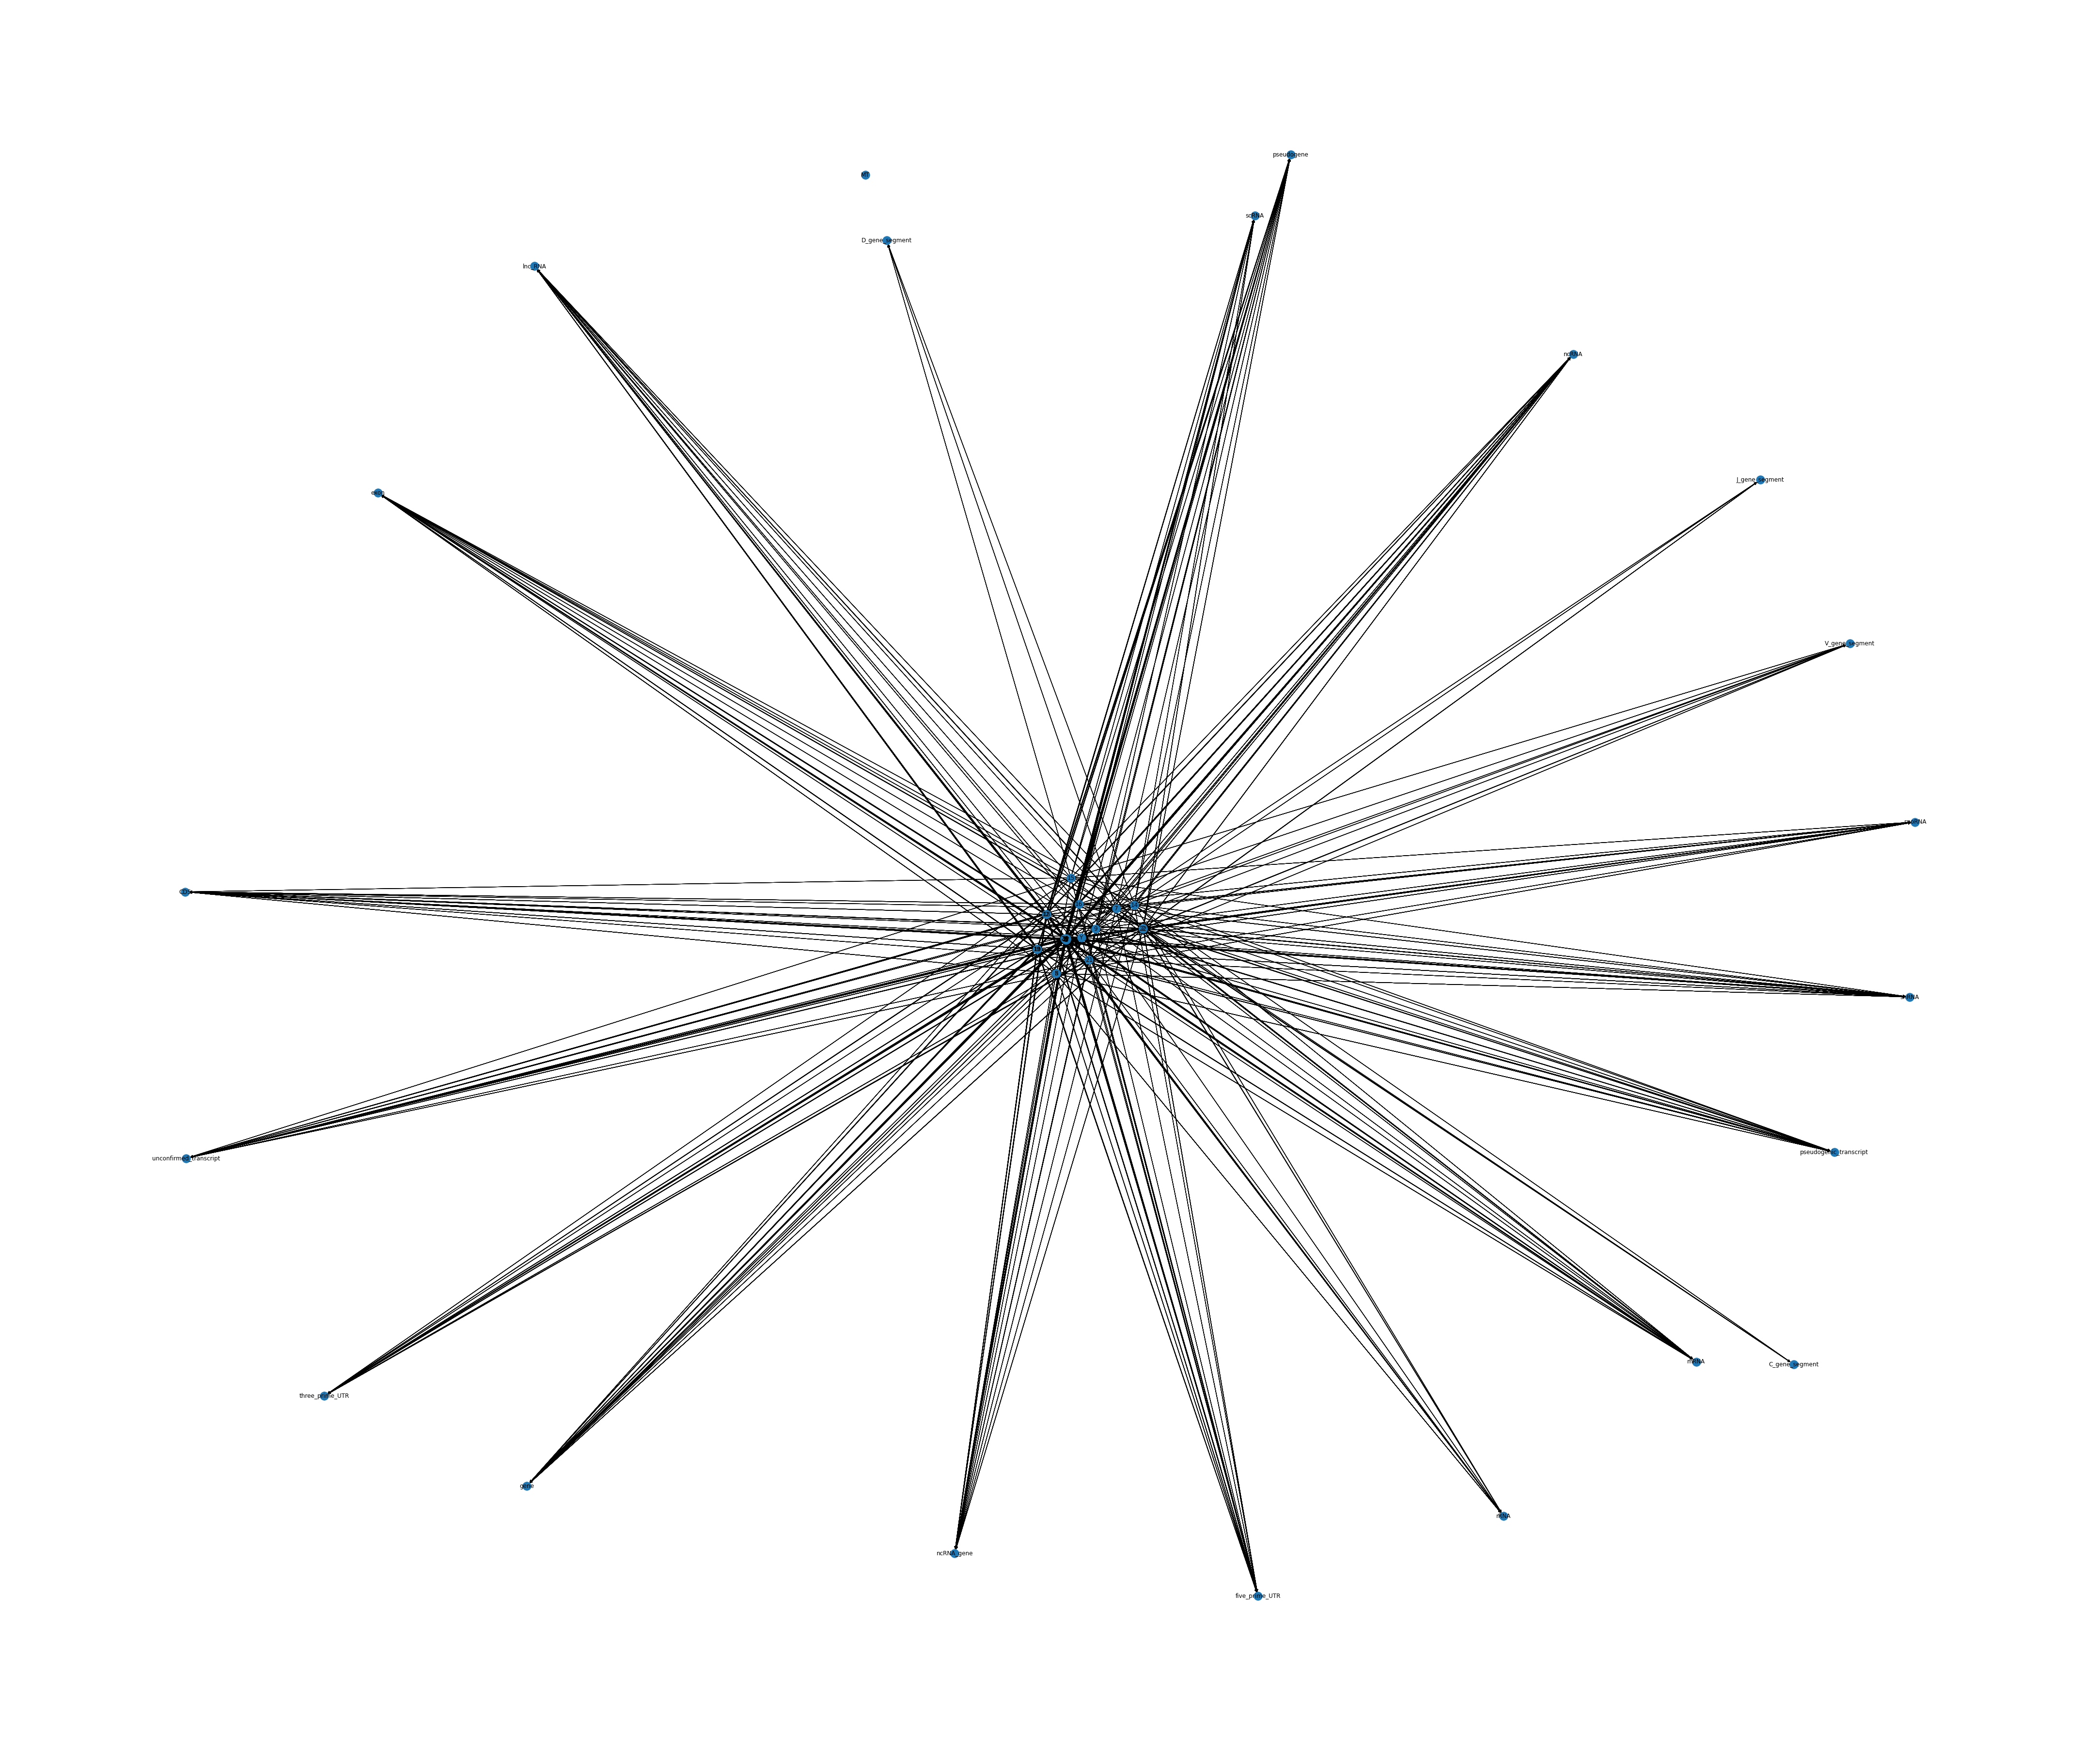

In [ ]:
f = plt.figure()
f.set_figwidth(60)
f.set_figheight(50)
nx.draw(g4, with_labels = True)
plt.savefig("nx2.pdf")

In [ ]:
import networkx as nx
G = nx.DiGraph()
g5 = nx.from_dict_of_dicts(d2, create_using=G)


In [ ]:
f = plt.figure()
f.set_figwidth(60)
f.set_figheight(50)
nx.draw(g5, with_labels = True)
plt.savefig("nx3.pdf")

In [ ]:
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.
    Licensed under Creative Commons Attribution-Share Alike

    If the graph is a tree this will return the positions to plot this in a
    hierarchical layout.

    G: the graph (must be a tree)

    root: the root node of current branch
    - if the tree is directed and this is not given,
      the root will be found and used
    - if the tree is directed and this is given, then
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given,
      then a random choice will be used.

    width: horizontal space allocated for this branch - avoids overlap with other branches

    vert_gap: gap between levels of hierarchy

    vert_loc: vertical location of root

    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''

        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)
        if len(children)!=0:
            dx = width/len(children)
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap,
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos


    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)



pos = hierarchy_pos(g3,1)
nx.draw(g3, pos=pos, with_labels=True)
plt.savefig('hierarchy.pdf')

In [ ]:
genest={}
geneids = ndf.gene_id.unique()
chrids = ndf.seqid.unique()
human = {}
for chid in chrids:
    for id in geneids:
        genes = ndf[(ndf.type == 'gene') &  (ndf.seqid == chid)]
        genest[id] = {'seqid':genes.seqid,'gene Name':genes.gene_name, 'start': genes.start , 'End' : genes.end ,
                      'length' : genes.length , 'Description' : genes.desc}
    print(chid)
    human[chid] = genest






print('success')


1
10
11
12
13
14
15
16
17
18
19
2
20
21
22
3
4
5
6
7
8
9
X
Y
success


In [ ]:
pip install networkx

In [ ]:
import networkx as nx
G = nx.MultiDiGraph()
g3 = nx.from_dict_of_dicts(human, multigraph_input=True, create_using=G)
g3.edges()

NameError: ignored

In [ ]:
df[(df.type == 'gene') & (df.seqid == '3')].seqid.count()

In [ ]:

df[(df.type == 'gene') & (df.seqid == '4')].seqid.count()

In [ ]:
gdf[gdf.seqid.isin(chrs)]

In [ ]:


plt.plot(gdf[gdf.seqid.isin(chrs)].seqid, gdf[gdf.seqid.isin(chrs)].length, alpha = 0.9)
#plt.show()

In [ ]:
gdf.sort_values('length').iloc[::-1]

In [ ]:
cdf = chr_gene_counts.to_frame(name='gene_count').reset_index()

In [ ]:
print(cdf)

In [ ]:
import pandas as ch

for i in range(gdf[gdf.seqid.isin(chrs)].seqid.count()):
   # print(df[(df.type == 'gene') & (df.seqid == i)])



In [ ]:
plt.plot(cdf.seqid, cdf.gene_count, alpha = 0.9)
#plt.show()

In [ ]:
merged = gdf.merge(cdf, on='seqid')

In [ ]:
plt.plot(merged.seqid, merged.gene_count, alpha = 0.9)
#plt.show()

In [ ]:
merged[['length', 'gene_count']].corr()

In [ ]:
import matplotlib as plt
ax = merged[['length', 'gene_count']].sort_values('length').plot(x='length', y='gene_count', style='o-')
# add some margin to both ends of x axis
xlim = ax.get_xlim()
margin = xlim[0] * 0.1
ax.set_xlim([xlim[0] - margin, xlim[1] + margin])
# Label each point on the graph
for (s, x, y) in merged[['seqid', 'length', 'gene_count']].sort_values('length').values:
    ax.text(x, y - 100, str(s))

In [ ]:
seqids = merged['seqid']
gene_counts = merged['gene_count']
start = merged['start']
end = merged['end']
start

In [ ]:
merged.gene_count.count()

In [ ]:
import networkx as nx
G = nx.Graph()

In [ ]:
G.add_nodes_from(d2)

In [ ]:
genome = {}

In [ ]:
genome['root'] = 'Human'


In [ ]:
print(G.nodes)

In [ ]:
import matplotlib.pyplot as plt

print(G.nodes)

nx.draw(G, with_labels=True, font_weight='bold')
#plt.show()


In [ ]:
for k,v in chromosomeToElements.items():
    G.add_edges_from(v)


nx.draw(G, with_labels=True, font_weight='bold')
#plt.show()




In [ ]:
print(G.nodes)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(cdf.seqid, cdf.gene_count, alpha = 0.9)
plt.show()